In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model #for linear regression

In [49]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [50]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [51]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
i= df_train.Foundation
i.describe()

count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object

In [53]:
df_train.SalePrice.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

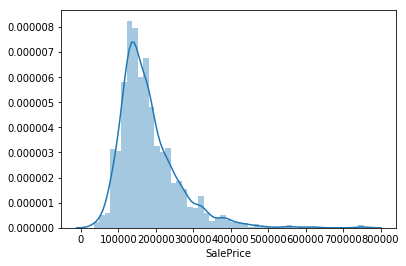

In [54]:
#histogram
sns.distplot(df_train['SalePrice'])

In [55]:
#determing useful features
nu_features = ['LotArea','OverallQual','YearBuilt','YearRemodAdd','BedroomAbvGr','KitchenAbvGr','GarageCars','YrSold','FullBath']
cat_features = ['CentralAir','SaleCondition','Electrical','Foundation']
nu_train = df_train[nu_features]
cat_train = df_train[cat_features]
nu_test = df_test[nu_features]
cat_test = df_test[cat_features]

In [56]:
# concatinating(merging) columns
x = pd.concat([nu_train , cat_train],axis=1)
df_test = pd.concat([nu_test,cat_test],axis=1)
x.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,GarageCars,YrSold,FullBath,CentralAir,SaleCondition,Electrical,Foundation
0,8450,7,2003,2003,3,1,2,2008,2,Y,Normal,SBrkr,PConc
1,9600,6,1976,1976,3,1,2,2007,2,Y,Normal,SBrkr,CBlock
2,11250,7,2001,2002,3,1,2,2008,2,Y,Normal,SBrkr,PConc
3,9550,7,1915,1970,3,1,3,2006,1,Y,Abnorml,SBrkr,BrkTil
4,14260,8,2000,2000,4,1,3,2008,2,Y,Normal,SBrkr,PConc


In [57]:
#filling missing values
x.fillna(method='ffill',inplace=True)
df_test.fillna(method='ffill',inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
GarageCars       1460 non-null int64
YrSold           1460 non-null int64
FullBath         1460 non-null int64
CentralAir       1460 non-null object
SaleCondition    1460 non-null object
Electrical       1460 non-null object
Foundation       1460 non-null object
dtypes: int64(9), object(4)
memory usage: 125.5+ KB


In [58]:
#using one hot encoding for catagorical values
x=pd.get_dummies(x)
x.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BedroomAbvGr,KitchenAbvGr,GarageCars,YrSold,FullBath,CentralAir_N,...,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,8450,7,2003,2003,3,1,2,2008,2,0,...,0,0,0,1,0,0,1,0,0,0
1,9600,6,1976,1976,3,1,2,2007,2,0,...,0,0,0,1,0,1,0,0,0,0
2,11250,7,2001,2002,3,1,2,2008,2,0,...,0,0,0,1,0,0,1,0,0,0
3,9550,7,1915,1970,3,1,3,2006,1,0,...,0,0,0,1,1,0,0,0,0,0
4,14260,8,2000,2000,4,1,3,2008,2,0,...,0,0,0,1,0,0,1,0,0,0


In [59]:
scaler = StandardScaler()    # feature scaling
x = scaler.fit_transform(x)


In [60]:
y= df_train.SalePrice

In [61]:

# split data into training and validation data, for both predictors and target
train_x, val_x, train_y, val_y = train_test_split(x,y,random_state = 0)

In [62]:
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(train_x, train_y)
print(reg.intercept_) #getting the value of intercerpt(theta0)
print(reg.coef_)    # getting thervalues of coefficients (theta1,theta2....)

181448.08637617496
[12392.42337275 41455.47557959 -5131.9784903   5462.38866749
  5301.0352274  -4180.45252042 16522.63793076   405.53046109
  8462.52160524  -444.20645509   444.20645509 -3100.46747454
 -1396.21700965  1384.76457816 -1331.40931114 -2450.00837983
  6539.1079474    744.32343262   664.52500805 -1724.72128473
  -694.27742601  -628.83882571 -4511.8605903    884.87054939
  1784.25228509  -431.91761222   472.57343597  1177.2987777 ]


In [63]:
 reg.predict(val_x.head())


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [64]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = reg.predict(val_x)
mean_absolute_error(val_y, predicted_home_prices)

30182.55437952706

In [65]:
#val_y.head()
#print(" accruracy %2.2f"%accuracy_score(val_y,reg.predict(val_x)))

from sklearn.metrics import accuracy_score
reg.score(val_x, val_y)

0.6767998003163518

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Define model
dtr_model = DecisionTreeRegressor()

# Fit model
dtr_model.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [67]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = dtr_model.predict(val_x)
mean_absolute_error(val_y, predicted_home_prices)

30926.369863013697

In [32]:
from sklearn.metrics import accuracy_score
dtr_model.score(val_x, val_y)

0.6781204431487693